#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    
    binary_crossentropy delivers better result than category_crossentropy
    MSE (mean_sqaured_erro) delivers the worst result among all.

# 導入必要的函數

In [22]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [23]:
#取得Keras Dataset
# Create training and test data set.
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [24]:
#確認 CIFAR10 Dataset 資料維度
# Print meta data of training data
print("train data:",'images:',x_img_train.shape, " labels:",y_label_train.shape) 

# Print meta data of testing data
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [25]:
#資料正規化
# Normalize training data and cast data type of float.
x_img_train_normalize = x_img_train.astype('float32') / 255.0

# Normalize testing data and cast data type of float.
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [26]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
# Use one-hot encoding to encode the label
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [28]:
# Create a sequential model
model = Sequential()

In [29]:
#卷積層1

In [30]:
# Add a convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [31]:
# Add a dropout layer.
# Dropout is a regularization is a technique where randomly selected neurons are ignored during training. 
# They are “dropped-out” randomly.
model.add(Dropout(rate=0.25))

In [33]:
# Set max pooling layer for temporal data
model.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
#卷積層2與池化層2

In [35]:
# Add a convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [36]:
# Add a dropout layer.
model.add(Dropout(0.25))

In [37]:
# Set max pooling layer for temporal data
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [39]:
# Add a flatten layer
# A flatten operation on a tensor reshapes the tensor to have a shape that is equal 
# to the number of elements contained in the tensor
model.add(Flatten())

# Add a dropout layer.
model.add(Dropout(rate=0.25))

In [40]:
# Add a hidden layer with 1024 neurons
model.add(Dense(1024, activation='relu'))

# Add a dropout layer.
model.add(Dropout(rate=0.25))

In [41]:
# Add a hidden layer output with 10 neurons
model.add(Dense(10, activation='softmax'))

In [42]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
__________

# 載入之前訓練的模型

In [43]:
try:
    # Loads the weights of the model from a HDF5 file 
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [46]:
# Configures the model for training.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [47]:
# Train the model
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.2779 - acc: 0.9008 - val_loss: 0.2824 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.2764 - acc: 0.9009 - val_loss: 0.2813 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.2748 - acc: 0.9012 - val_loss: 0.2798 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.2733 - acc: 0.9013 - val_loss: 0.2783 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.2721 - acc: 0.9016 - val_loss: 0.2770 - val_acc: 0.9001
Epoch 6/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.2702 - acc: 0.9017 - val_loss: 0.2755 - val_acc: 0.9002
Epoch 7/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.2688 - acc: 0.9019 - val_loss: 0.2743 - val_acc

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

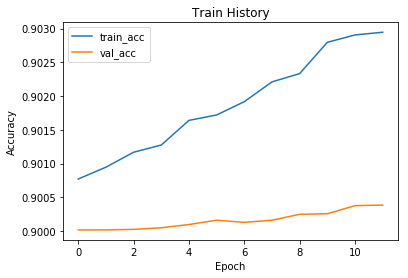

In [49]:
show_train_history('acc','val_acc')

In [51]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

In [52]:
# Train the model
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)      

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.0696 - acc: 0.4397 - val_loss: 0.0668 - val_acc: 0.5121
Epoch 2/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.0603 - acc: 0.5356 - val_loss: 0.0609 - val_acc: 0.5533
Epoch 3/12
37500/37500 [==============================] - 48s 1ms/step - loss: 0.0554 - acc: 0.5787 - val_loss: 0.0558 - val_acc: 0.6027
Epoch 4/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.0516 - acc: 0.6108 - val_loss: 0.0526 - val_acc: 0.6225
Epoch 5/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.0487 - acc: 0.6383 - val_loss: 0.0508 - val_acc: 0.6339
Epoch 6/12
37500/37500 [==============================] - 46s 1ms/step - loss: 0.0466 - acc: 0.6543 - val_loss: 0.0495 - val_acc: 0.6488
Epoch 7/12
37500/37500 [==============================] - 45s 1ms/step - loss: 0.0444 - acc: 0.6745 - val_loss: 0.0470 - val_acc

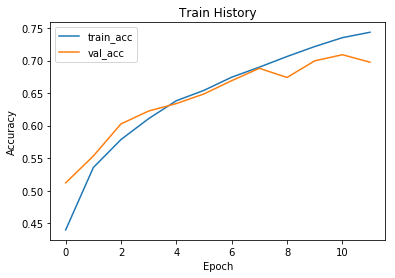

In [53]:
show_train_history('acc','val_acc')